In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.io import imread
from skimage.color import rgb2gray
import scipy
from scipy.signal import convolve2d
import cv2

In [38]:
image_1 = cv2.cvtColor(imread('/content/Photo_Unblur_Before_KpGfyYx.max-1000x1000.png'), cv2.COLOR_BGR2GRAY).astype(float)
image_2 = cv2.cvtColor(imread('/content/FiljQr_XwAEB1qA.jpeg'), cv2.COLOR_BGR2GRAY).astype(float)
image_3 = cv2.cvtColor(imread('/content/FlA4ZjaagAANx_f.jpeg'), cv2.COLOR_BGR2GRAY).astype(float)

In [48]:
def sharpen_image(image, sigma, mean):

    lap_filter = np.array( [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    filtered_image = convolve2d(image.copy(),lap_filter, mode='same')

    k_filtered_image = np.abs(filtered_image.copy()) - np.min(np.abs(filtered_image.copy()))
    k_filtered_image *= 255/np.max(k_filtered_image)

    k = np.exp(-((k_filtered_image-mean)**2)/(2*sigma**2))

    alpha = 2
    sharpened_image = image.copy() + (alpha * k * filtered_image.copy())
    sharpened_image[sharpened_image>255] = 255
    sharpened_image[sharpened_image<0] = 0

    sharpened_image_constant_k = image.copy() +  alpha * filtered_image
    sharpened_image_constant_k[sharpened_image_constant_k>255] = 255
    sharpened_image_constant_k[sharpened_image_constant_k<0] = 0

    return sharpened_image, sharpened_image_constant_k

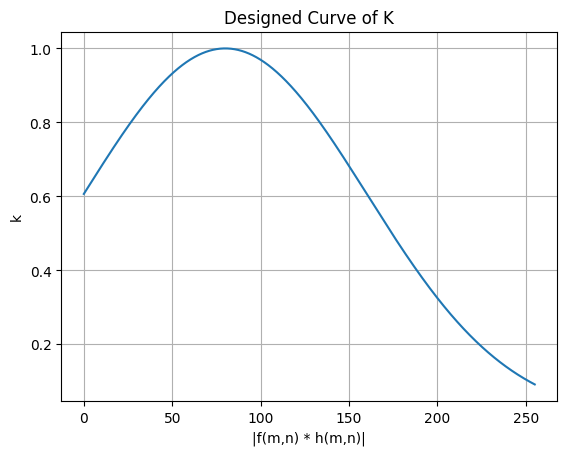

In [60]:
sigma = 80
mean = 80
x = np.linspace(0,255,1000)
f = np.exp(-((x-mean)**2)/(2*sigma**2))
plt.plot(x,f)
plt.xlabel('|f(m,n) * h(m,n)|')
plt.ylabel('k')
plt.title('Designed Curve of K')
plt.grid()

Text(0.5, 1.0, 'Sharpened Image using Constant K')

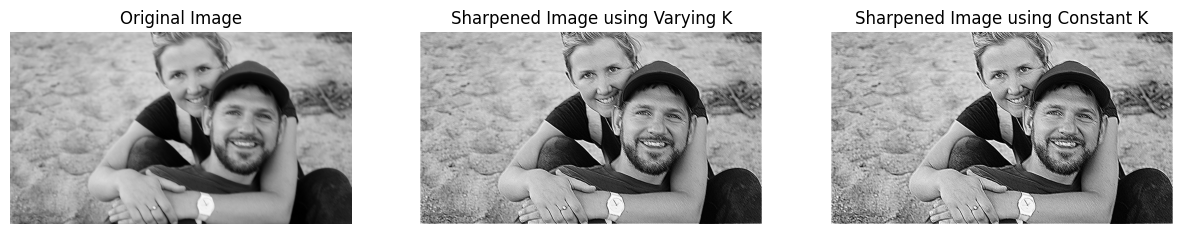

In [58]:
plt.figure(figsize= (15,10))

# Image 1
plt.subplot(1,3,1)
plt.imshow(image_1,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(sharpen_image(image_1, sigma = 80, mean = 80)[0], cmap='gray')
plt.axis('off')
plt.title('Sharpened Image using Varying K')
plt.subplot(1,3,3)
plt.imshow(sharpen_image(image_1, sigma = 80, mean = 80)[1], cmap='gray')
plt.axis('off')
plt.title('Sharpened Image using Constant K')

Text(0.5, 1.0, 'Sharpened Image using Constant K')

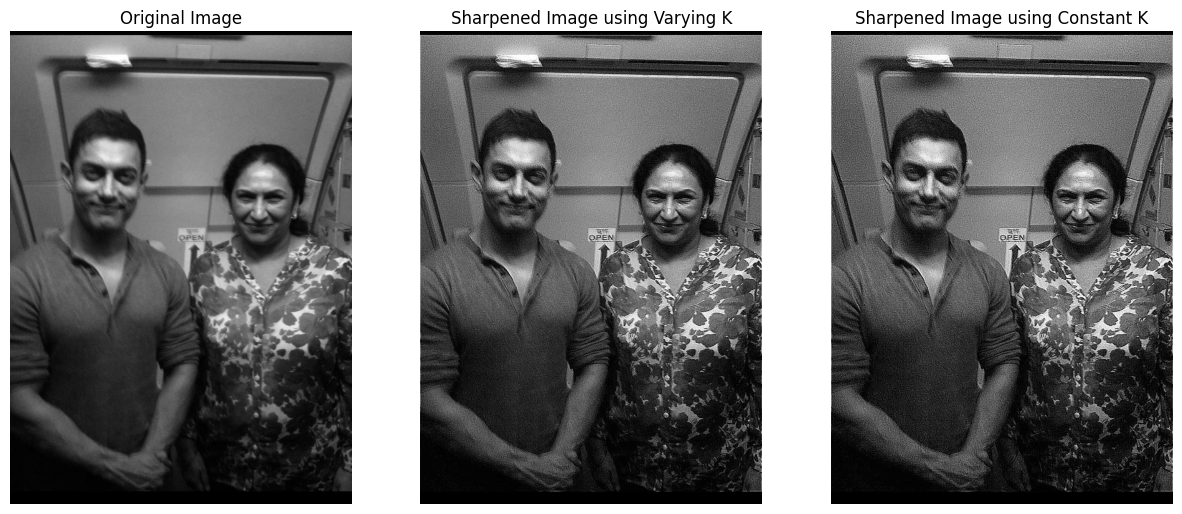

In [59]:
plt.figure(figsize= (15,10))

# Image 2
plt.subplot(1,3,1)
plt.imshow(image_2,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(sharpen_image(image_2, sigma = 80, mean = 80)[0], cmap='gray')
plt.axis('off')
plt.title('Sharpened Image using Varying K')
plt.subplot(1,3,3)
plt.imshow(sharpen_image(image_2, sigma = 80, mean = 80)[1], cmap='gray')
plt.axis('off')
plt.title('Sharpened Image using Constant K')

Text(0.5, 1.0, 'Sharpened Image using Constant K')

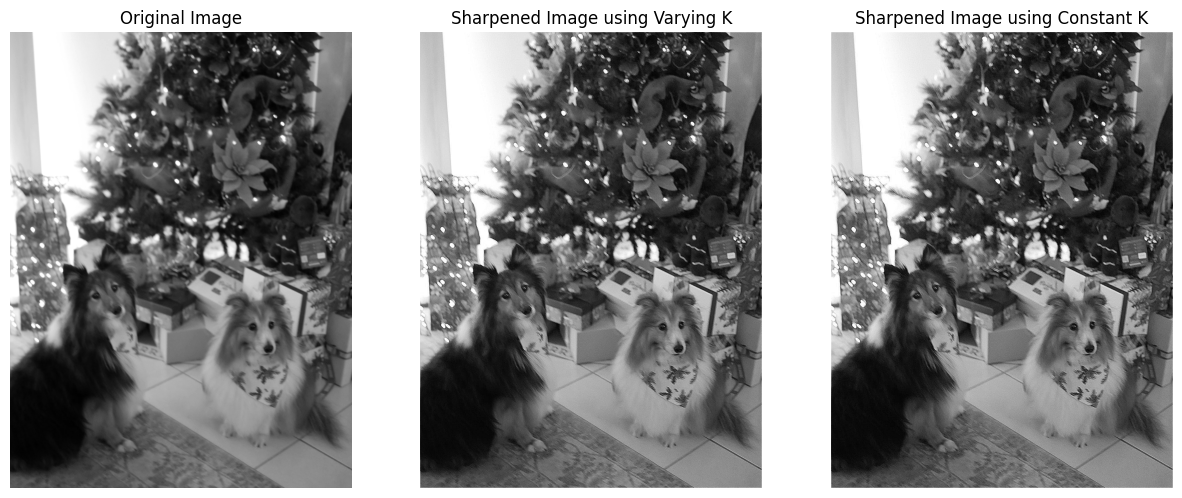

In [51]:
plt.figure(figsize= (15,10))

# Image 3
plt.subplot(1,3,1)
plt.imshow(image_3,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(sharpen_image(image_3, sigma = 80, mean = 80)[0], cmap='gray')
plt.axis('off')
plt.title('Sharpened Image using Varying K')
plt.subplot(1,3,3)
plt.imshow(sharpen_image(image_3, sigma = 80, mean = 80)[1], cmap='gray')
plt.axis('off')
plt.title('Sharpened Image using Constant K')